<a href="https://colab.research.google.com/github/FaizaAli-Dev/AI-DS-Projects/blob/All-about-AI-and-Data-Science/PCA_on_Iris_dataset.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [3]:
import numpy as np
import seaborn as sns
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler

In [4]:
from sklearn.datasets import load_iris
iris_data=load_iris()
x,y=iris_data['data'],iris_data['target']
print(x.shape)
print(y.shape)


(150, 4)
(150,)


In [5]:
from sklearn.decomposition import PCA

In [6]:
scaler = StandardScaler()
x_scaled = scaler.fit_transform(x)
pca=PCA(n_components=1)
x_pca = pca.fit_transform(x_scaled)

In [7]:
# Step 2 : we will find the covariance matrix
cov_matrix = np.cov(x_scaled.T)
cov_matrix

array([[ 1.00671141, -0.11835884,  0.87760447,  0.82343066],
       [-0.11835884,  1.00671141, -0.43131554, -0.36858315],
       [ 0.87760447, -0.43131554,  1.00671141,  0.96932762],
       [ 0.82343066, -0.36858315,  0.96932762,  1.00671141]])

# Plot the covariance matrix


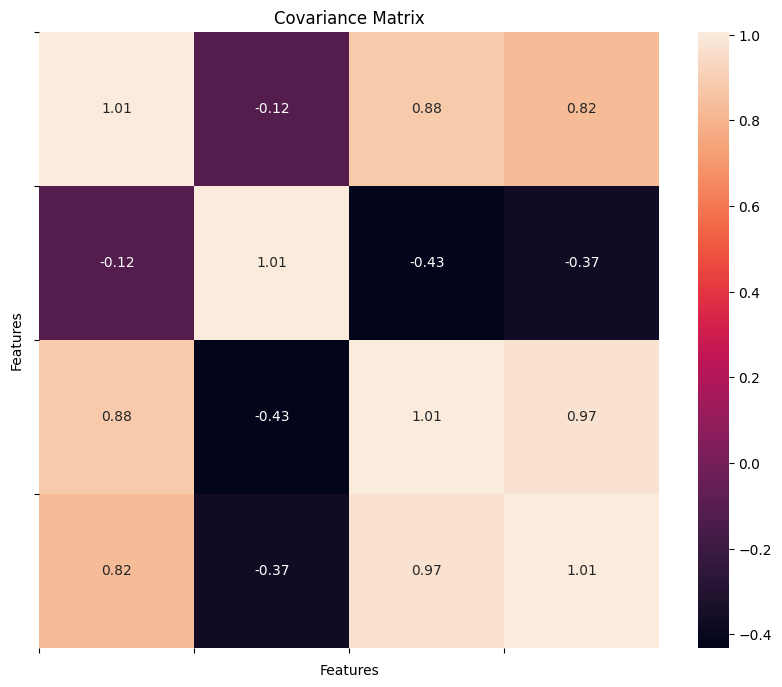

In [10]:
num_features = cov_matrix.shape[0]

# Plot the covariance matrix
fig = plt.figure(figsize =(10, 8))
sns.heatmap(cov_matrix, annot=True, fmt=".2f")
plt.title('Covariance Matrix')
plt.xlabel('Features')
plt.ylabel('Features')
# Set the tick labels for x-axis and y-axis
plt.xticks(range(num_features))
plt.yticks(range(num_features))
plt.show()

In [11]:
# Step 3: Compute the eigenvectors and eigenvalues of the covariance matrix
eigenvalues, eigenvectors = np.linalg.eig(cov_matrix)

#print("eigenvalues",eigenvalues)
temp_eigenvalues = pd.DataFrame(eigenvalues , index = iris_data.feature_names)
temp_eigenvalues


,0
sepal length (cm),2.938085
sepal width (cm),0.920165
petal length (cm),0.147742
petal width (cm),0.020854


In [15]:
#print("eigenvectors", eigenvectors)
temp_eigenvectors = pd.DataFrame(eigenvectors , columns=iris_data.feature_names , index=iris_data.feature_names)
temp_eigenvectors

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
sepal length (cm),0.521066,-0.377418,-0.719566,0.261286
sepal width (cm),-0.269347,-0.923296,0.244382,-0.123510
petal length (cm),0.580413,-0.024492,0.142126,-0.801449
petal width (cm),0.564857,-0.066942,0.634273,0.523597


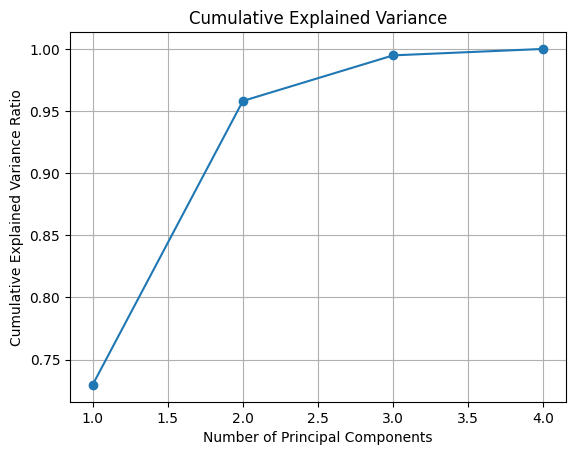

In [16]:
# Step 4: Create a feature vector to decide which principal components to keep
explained_variance_ratio = eigenvalues / np.sum(eigenvalues)
cumulative_variance_ratio = np.cumsum(explained_variance_ratio)

# Plot the explained variance ratio
plt.plot(range(1, len(explained_variance_ratio) + 1), cumulative_variance_ratio, marker='o')
plt.xlabel('Number of Principal Components')
plt.ylabel('Cumulative Explained Variance Ratio')
plt.title('Cumulative Explained Variance')
plt.grid(True)
plt.show()

In [29]:
from sklearn.decomposition import PCA

In [38]:
# Step 5: Recast the data along the principal components axes
n_components = 6  # Choose the number of components to keep
pca = PCA(n_components=n_components)
X_pca = PCA.fit_transform(x_scaled)

# Plot the transformed data after PCA
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')

# Extract the first three components for plotting
x = X_pca[:, 0]
y = X_pca[:, 1]
z = X_pca[:, 2]

# Plot the data points
ax.scatter(x, y, z)

# Set labels and title
ax.set_xlabel('PC1')
ax.set_ylabel('PC2')
ax.set_zlabel('PC3')
ax.set_title('Graph')

# Show the plot
plt.show()

TypeError: ignored

Scratch PCA

In [22]:
import numpy as np
class PCA:
    def __init__(self, n_components):
        self.n_components = n_components
        self.components = None
        self.mean = None
    def fit(self, X):
        # center the data
        self.mean = np.mean(X, axis=0)
        X = X - self.mean

        # compute the covariance matrix
        cov = np.cov(X, rowvar=False)

        # compute the eigenvalues and eigenvectors of the covariance matrix
        eigenvalues, eigenvectors = np.linalg.eigh(cov)

        # sort the eigenvalues and eigenvectors in decreasing order
        idx = np.argsort(eigenvalues)[::-1]
        eigenvalues = eigenvalues[idx]
        eigenvectors = eigenvectors[:, idx]

        # store the first n_components eigenvectors as the principal components
        self.components = eigenvectors[:, : self.n_components]

    def transform(self, X):
        # center the data
        X = X - self.mean

        # project the data onto the principal components
        X_transformed = np.dot(X, self.components)

        return X_transformed

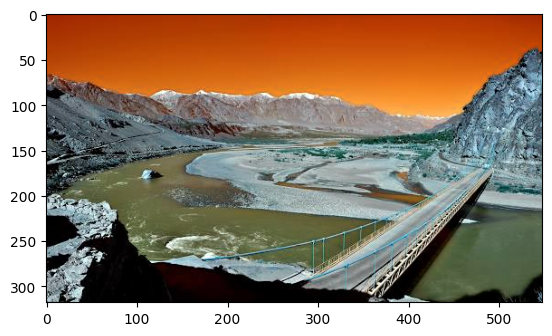

In [24]:
import cv2
img = cv2.imread('/content/gb.jpg')
plt.imshow(img)

In [ ]:
img_array = np.array(img)
img_array.shape
# RGB

In [26]:

# Assuming you have an image 'img' with shape (height, width, channels)
print("Original image shape:", img.shape)

# Reshape the image into a 2D array
img_reshaped = img.reshape(-1, img.shape[-1])
print("Reshaped image shape:", img_reshaped.shape)


Original image shape: (318, 548, 3)
Reshaped image shape: (174264, 3)


In [27]:
# Apply PCA
pca = PCA(n_components=2)  # You can choose the desired number of components
img_pca = pca.fit_transform(img_reshaped)

# Print the shape of the PCA-transformed image
print("PCA-transformed image shape:", img_pca.shape)

AttributeError: ignored

In [28]:
# Reshape the PCA-transformed image back to the original shape
img_reconstructed = pca.inverse_transform(img_pca)
img_reconstructed = img_reconstructed.reshape(img.shape)

# Display the original and reconstructed images
plt.subplot(1, 2, 1)
plt.title('Original Image')
plt.imshow(img)
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title('Reconstructed Image after PCA')
plt.imshow(img_reconstructed)
plt.axis('off')

plt.tight_layout()
plt.show()

AttributeError: ignored